# [PCS3635] Análise de Dados

In [276]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import MaxNLocator
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from plotnine import (
    ggplot,
    aes,
    after_stat,
    geom_histogram,
    geom_qq,
    geom_vline,
    geom_qq_line,
    geom_density,
    facet_wrap,
    facet_grid,
    coord_flip,
    scale_y_continuous,
    scale_y_sqrt,
    scale_y_log10,
    scale_x_log10,
    scale_fill_manual,
    theme_bw,
    theme_xkcd,
)

## Estatística

In [277]:
critic_p_value = 0.05

In [278]:
linkert_categories = [1, 2, 3, 4, 5]

In [279]:
def get_percentage_str(fraction: float) -> str:
    """Converts an fraction in to a percentage

    Args:
        fraction (float): _description_

    Returns:
        str: _description_
    
    Examples:
        >>> get_percentage_str(0.01537)
        54.23 %
        
        >>> get_percentage_str(0.5672434)
        56.72 %
    """
    percentage_str = 100*fraction
    percentage_str = f'{percentage_str:.2f}%'
    
    return percentage_str

In [280]:
def count_linkert(data: np.array) -> np.array:
    """Counts the number of ocurrencies of every category of the linkert scale

    Args:
        data (np.array): the input data

    Returns:
        np.array: the counting vector, with the number of occurrences 
    
    Examples:
        >>> input_data = np.array([4, 1, 2, 2, 1, 4, 4, 1, 4])
        >>> count_linkert(input_data)
        array([3., 2., 0., 4., 0.])
    """
    linkert_counting = np.zeros(5)
    
    for i, category in enumerate(linkert_categories):
        linkert_counting[i] += data[data == category].size
    
    return linkert_counting

## Leitura do CSV

In [281]:
df = pd.read_csv('encoded_data.csv')

## Descrição Básica do Dataframe 

In [282]:
df.head()

,date,PA_1,PA_2,PA_3,PA_4,PA_5,PA_6,PA_7,PA_8,PA_8_1,...,PS_4_2,PS_4_3,PS_4_4,PS_4_5,PS_5,PS_6,PS_7_1,PS_7_2,PS_7_3,PS_8
0,22/04/2024 15:22:50,1,4,8.0,12.0,4,3,5,"Se atrasar com o conteúdo outras disciplinas, ...",1,...,2.0,2.0,1.0,1.0,-5.0,1.0,2.0,1.0,0.0,NaN
1,22/04/2024 15:23:42,1,1,12.0,40.0,4,1,5,"Se atrasar com o conteúdo outras disciplinas, ...",1,...,3.0,2.0,2.0,2.0,5.0,1.0,0.0,2.0,1.0,O fato de LabDig exigir mais tempo que o norma...
2,22/04/2024 15:24:48,2,4,8.0,9.0,2,1,2,Falta de tempo para o EP de [PCS3616] Sistemas...,0,...,3.0,3.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,NaN
3,22/04/2024 15:29:14,2,4,6.0,30.0,4,3,4,"Se atrasar com o conteúdo outras disciplinas, ...",1,...,4.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,"A matéria em si foi exigente, foi puxada, p..."
4,22/04/2024 15:43:26,1,5,1.0,10.0,1,1,1,NaN,0,...,5.0,5.0,5.0,5.0,15.0,0.0,0.0,0.0,0.0,NaN


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     31 non-null     object 
 1   PA_1     31 non-null     int64  
 2   PA_2     31 non-null     int64  
 3   PA_3     29 non-null     float64
 4   PA_4     28 non-null     float64
 5   PA_5     31 non-null     int64  
 6   PA_6     31 non-null     int64  
 7   PA_7     31 non-null     int64  
 8   PA_8     29 non-null     object 
 9   PA_8_1   31 non-null     int64  
 10  PA_8_2   31 non-null     int64  
 11  PA_8_3   31 non-null     int64  
 12  PA_8_4   31 non-null     int64  
 13  PA_8_5   31 non-null     int64  
 14  PA_8_6   31 non-null     int64  
 15  PA_8_7   31 non-null     int64  
 16  PA_8_8   31 non-null     int64  
 17  PA_8_9   31 non-null     int64  
 18  PA_9     28 non-null     float64
 19  PA_10    31 non-null     int64  
 20  PA_11_1  29 non-null     float64
 21  PA_11_2  29 non-nu

In [284]:
df.shape

(31, 53)

## Configuração das Figuras

In [285]:
# if this variable is True, when the notebook is fully executed, all the figures will be replaced
# by the new figures of this notebook
save_all_figures = True

In [286]:
fig_default_size = (8, 6)
fig_default_color = 'darkblue'
top_bar_text_offset = 0.5
right_bar_text_offset = 1.5

fig_2_subplots_default_size = (6, 4)

## Pesquisa Acadêmica

### PA_1
De qual turma você faz parte?<br>
- (a) Segunda-Feira<br>
- (b) Quarta-Feira

In [287]:
PA_1 = df['PA_1']

# separation by groups
monday_df = df[df['PA_1'] == 1]
wednesday_df = df[df['PA_1'] == 2]

PA_1.shape, monday_df.shape, wednesday_df.shape

((31,), (11, 53), (20, 53))

In [288]:
# total number of students per group
monday_total_n = 38
wednesday_total_n = 27

# total number of students that answered the research per group
monday_total_n_answered = monday_df.shape[0]
wednesday_total_n_answered = wednesday_df.shape[0]

# n answers / n students per group
monday_fraction_answered = monday_total_n_answered/monday_total_n
wednesday_fraction_answered = wednesday_total_n_answered/wednesday_total_n

# n answers / n students per group in percentage
monday_fraction_answered_percentage = 100*monday_fraction_answered
wednesday_fraction_answered_percentage = 100*wednesday_fraction_answered

groups = {
    'monday_total_n': monday_total_n,
    'wednesday_total_n': wednesday_total_n,
    'monday_total_n_answered': monday_total_n_answered,
    'wednesday_total_n_answered': wednesday_total_n_answered,
    'monday_fraction_answered': monday_fraction_answered,
    'wednesday_fraction_answered': wednesday_fraction_answered,
    'monday_fraction_answered_percentage': monday_fraction_answered_percentage,
    'wednesday_fraction_answered_percentage': wednesday_fraction_answered_percentage
}

groups

{'monday_total_n': 38,
 'wednesday_total_n': 27,
 'monday_total_n_answered': 11,
 'wednesday_total_n_answered': 20,
 'monday_fraction_answered': 0.2894736842105263,
 'wednesday_fraction_answered': 0.7407407407407407,
 'monday_fraction_answered_percentage': 28.947368421052634,
 'wednesday_fraction_answered_percentage': 74.07407407407408}

In [289]:
# resume
PA_1_resume = {
    'turma': ['segunda', 'quarta'],
    'total de alunos': [groups['monday_total_n'], groups['wednesday_total_n']],
    'quantidade de respostas': [groups['monday_total_n_answered'], groups['wednesday_total_n_answered']],
    'quantidade de respostas (%)': [groups['monday_fraction_answered_percentage'], groups['wednesday_fraction_answered_percentage']]
}

PA_1_resume_table = pd.DataFrame(PA_1_resume)

PA_1_resume_table

,turma,total de alunos,quantidade de respostas,quantidade de respostas (%)
0,segunda,38,11,28.947368
1,quarta,27,20,74.074074


Contingency test

In [290]:
PA_1_np_contingency_table = np.array([
    [groups['monday_total_n_answered'], groups['monday_total_n'] - groups['monday_total_n_answered']],
    [groups['wednesday_total_n_answered'], groups['wednesday_total_n'] - groups['wednesday_total_n_answered']]])

PA_1_np_contingency_table

array([[11, 27],
       [20,  7]])

In [291]:
chi2, p, dof, expected = chi2_contingency(PA_1_np_contingency_table)

significant_difference = p < critic_p_value


print(f'chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'degrees of freedom: {dof}\n')
print(f'expected frequencies:\n{expected}')
print(f'obtained frequencies:\n{PA_1_np_contingency_table}\n')
print(f'significant difference: {significant_difference}')

chi-squared: 11.139653866640034
p-value: 0.0008450165780109888
degrees of freedom: 1

expected frequencies:
[[18.12307692 19.87692308]
 [12.87692308 14.12307692]]
obtained frequencies:
[[11 27]
 [20  7]]

significant difference: True


### PA_2
A disciplina possuiu dois créditos de trabalho (3h20/semana). O tempo gasto por você com a disciplina, em período fora de sala de aula, ficou dentro desse limite?
- (a) Foi muito abaixo desse limite
- (b) Foi abaixo do limite
- (c) Foi adequado
- (d) Foi acima desse limite
- (e) Foi muito acima do limite

In [292]:
PA_2 = df['PA_2']
PA_2_monday = monday_df['PA_2']
PA_2_wednesday = wednesday_df['PA_2']

PA_2.shape, PA_2_monday.shape, PA_2_wednesday.shape

((31,), (11,), (20,))

In [293]:
PA_2_classes = [1, 2, 3, 4, 5]

# index mapping
PA_2_categories_mapping = {
    1: 'muito abaixo',
    2: 'abaixo',
    3: 'adequado', 
    4: 'acima',
    5: 'muito acima'
}

# categories
PA_2_categories = [PA_2_categories_mapping[PA_2_class] for PA_2_class in PA_2_classes]

# counting categories
PA_2_counting = PA_2.value_counts()
PA_2_monday_counting = PA_2_monday.value_counts()
PA_2_wednesday_counting = PA_2_wednesday.value_counts()

# n = quantity of answers per dataframe
PA_2_n_answers = PA_2.shape[0]
PA_2_monday_n_answers = PA_2_monday.shape[0]
PA_2_wednesday_n_answers = PA_2_wednesday.shape[0]

# filling with 0 non observed categories
PA_2_counting = PA_2_counting.reindex(PA_2_classes, fill_value=0)
PA_2_monday_counting = PA_2_monday_counting.reindex(PA_2_classes, fill_value=0)
PA_2_wednesday_counting = PA_2_wednesday_counting.reindex(PA_2_classes, fill_value=0)

# casting in numpy arrays
PA_2_counting = np.array(PA_2_counting)
PA_2_monday_counting = np.array(PA_2_monday_counting)
PA_2_wednesday_counting = np.array(PA_2_wednesday_counting)

# resume
print(f'PA_2_counting\nn_answers: {PA_2_n_answers}\narray: {PA_2_counting}\n')
print(f'PA_2_monday_counting\nn_answers: {PA_2_monday_n_answers}\narray: {PA_2_monday_counting}\n')
print(f'PA_2_wednesday_counting\nn_answers: {PA_2_wednesday_n_answers}\narray: {PA_2_wednesday_counting}\n')

PA_2_counting
n_answers: 31
array: [ 1  0  0 13 17]

PA_2_monday_counting
n_answers: 11
array: [1 0 0 5 5]

PA_2_wednesday_counting
n_answers: 20
array: [ 0  0  0  8 12]



In [294]:
# frequencies calculation
PA_2_frequency = PA_2_counting/sum(PA_2_counting)
PA_2_monday_frequency = PA_2_monday_counting/sum(PA_2_monday_counting)
PA_2_wednesday_frequency = PA_2_wednesday_counting/sum(PA_2_wednesday_counting)

print(f'general: {PA_2_frequency}\nmonday: {PA_2_monday_frequency}\nwednesday: {PA_2_wednesday_frequency}')

general: [0.03225806 0.         0.         0.41935484 0.5483871 ]
monday: [0.09090909 0.         0.         0.45454545 0.45454545]
wednesday: [0.  0.  0.  0.4 0.6]


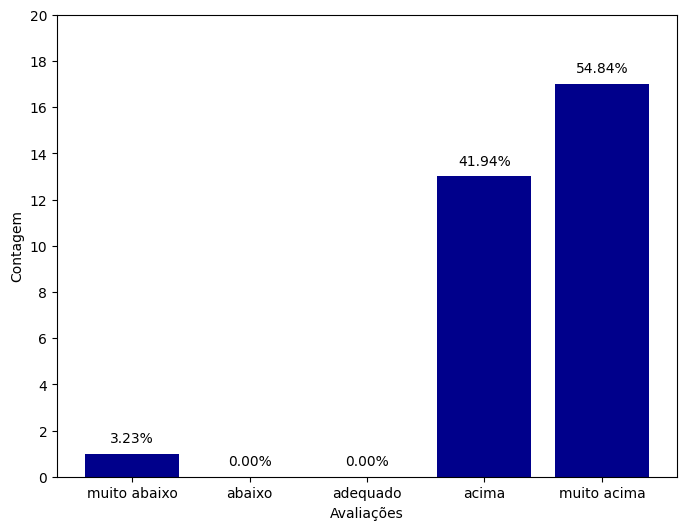

In [295]:
# plotting PA_2 for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 20)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_general_classes')
    
# showing the figure
plt.show()

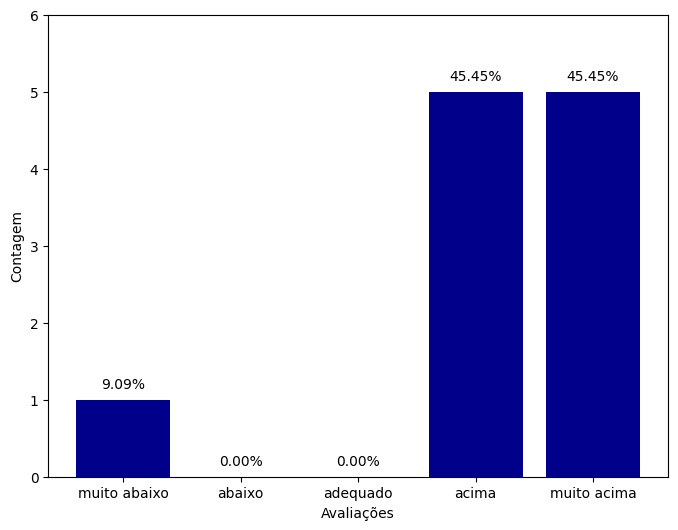

In [296]:
# plotting PA_2 for general counting in monday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_monday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 6)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_monday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_monday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_monday_classes')
    
# showing the figure
plt.show()

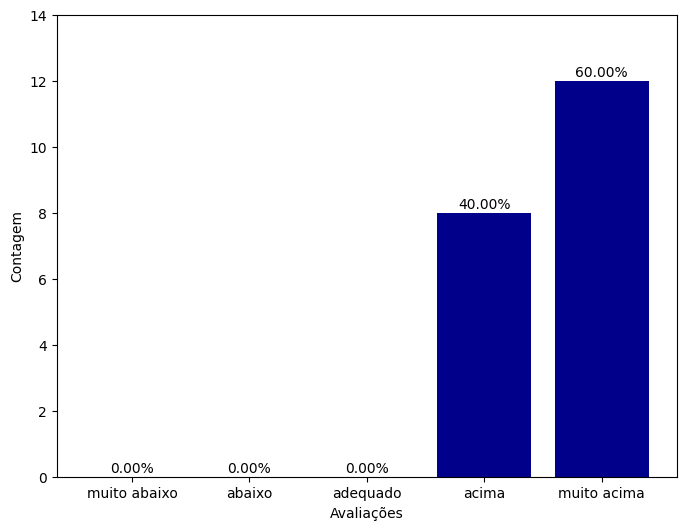

In [297]:
# plotting PA_2 for general counting in wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_wednesday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 14)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_wednesday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_wednesday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_wednesday_classes')
    
# showing the figure
plt.show()

Binarização dos dados

In [298]:
# binarization of the data

# general
PA_2_bin_counting_under = sum(PA_2_counting[0:2])
PA_2_bin_counting_over = sum(PA_2_counting[3:5])
PA_2_bin_counting = np.array([PA_2_bin_counting_under, PA_2_bin_counting_over])

# monday
PA_2_monday_bin_counting_under = sum(PA_2_monday_counting[0:2])
PA_2_monday_bin_counting_over = sum(PA_2_monday_counting[3:5])
PA_2_monday_bin_counting = np.array([PA_2_monday_bin_counting_under, PA_2_monday_bin_counting_over])

# wednesday
PA_2_wednesday_bin_counting_under = sum(PA_2_wednesday_counting[0:2])
PA_2_wednesday_bin_counting_over = sum(PA_2_wednesday_counting[3:5])
PA_2_wednesday_bin_counting = np.array([PA_2_wednesday_bin_counting_under, PA_2_wednesday_bin_counting_over])

PA_2_bin_counting, PA_2_monday_bin_counting, PA_2_wednesday_bin_counting

(array([ 1, 30]), array([ 1, 10]), array([ 0, 20]))

In [299]:
# frequency counting for the binary data
PA_2_bin_frequency = PA_2_bin_counting/sum(PA_2_bin_counting)
PA_2_monday_bin_frequency = PA_2_monday_bin_counting/sum(PA_2_monday_bin_counting)
PA_2_wednesday_bin_frequency = PA_2_wednesday_bin_counting/sum(PA_2_wednesday_bin_counting)

PA_2_bin_frequency, PA_2_monday_bin_frequency, PA_2_wednesday_bin_frequency

(array([0.03225806, 0.96774194]),
 array([0.09090909, 0.90909091]),
 array([0., 1.]))

In [300]:
# resume

# PA_2_resume = {
#     'geral (contagem)': PA_2_bin_counting,
#     'segunda (contagem)': PA_2_monday_bin_counting,
#     'quarta (contagem)': PA_2_wednesday_bin_counting,
#     'geral (frequência)': PA_2_bin_frequency, 
#     'segunda (frequência)': PA_2_monday_bin_frequency, 
#     'quarta (frequência)': PA_2_wednesday_bin_frequency
# }

PA_2_resume = [
    {'sim (contagem)': PA_2_bin_counting[1], 'não (contagem)': PA_2_bin_counting[0], 
     'sim (frequência)': PA_2_bin_frequency[1], 'não (frequência)': PA_2_bin_frequency[1]},
    
    {'sim (contagem)': PA_2_monday_bin_counting[1], 'não (contagem)': PA_2_monday_bin_counting[0], 
     'sim (frequência)': PA_2_monday_bin_frequency[1], 'não (frequência)': PA_2_monday_bin_frequency[0]},
    
    {'sim (contagem)': PA_2_wednesday_bin_counting[1], 'não (contagem)': PA_2_wednesday_bin_counting[0], 
     'sim (frequência)': PA_2_wednesday_bin_frequency[1], 'não (frequência)': PA_2_wednesday_bin_frequency[0]}
]

PA_2_indexes = ['geral', 'segunda', 'quarta']

PA_2_resume_table = pd.DataFrame(PA_2_resume, index=PA_2_indexes)

PA_2_resume_table

,sim (contagem),não (contagem),sim (frequência),não (frequência)
geral,30,1,0.967742,0.967742
segunda,10,1,0.909091,0.090909
quarta,20,0,1.000000,0.000000


In [301]:
# confidence intervals
PA_2_ci_low, PA_2_ci_high = sm.stats.proportion_confint(
    PA_2_bin_counting[1],
    PA_2_bin_counting[1] + PA_2_bin_counting[0],
    alpha=0.05,
    method='wilson'
    )

PA_2_monday_ci_low, PA_2_monday_ci_high = sm.stats.proportion_confint(
    PA_2_monday_bin_counting[1],
    PA_2_monday_bin_counting[1] + PA_2_monday_bin_counting[0],
    alpha=0.05,
    method='wilson'
    )

PA_2_wednesday_ci_low, PA_2_wednesday_ci_high = sm.stats.proportion_confint(
    PA_2_wednesday_bin_counting[1],
    PA_2_wednesday_bin_counting[1] + PA_2_wednesday_bin_counting[0],
    alpha=0.05,
    method='wilson'
    )

print(f'PA_2 confidence intervals for bin data:')
print(f'general:   ({PA_2_ci_low}, {PA_2_ci_high})')
print(f'monday:    ({PA_2_monday_ci_low}, {PA_2_monday_ci_high})')
print(f'wednesday: ({PA_2_wednesday_ci_low}, {PA_2_wednesday_ci_high})')

PA_2 confidence intervals for bin data:
general:   (0.838058948352751, 0.9942827784745831)
monday:    (0.6226415635484044, 0.9837678271141153)
wednesday: (0.8388748419471804, 0.9999999999999999)


### PA_3
Durante as semanas de projeto, você participou do openlab com que frequência? Favor, indicar quantas vezes você foi e por quanto tempo costumava ficar nele.

In [302]:
PA_3 = df['PA_3']
PA_3_monday = monday_df['PA_3']
PA_3_wednesday = wednesday_df['PA_3']

PA_3 = PA_3.dropna()
PA_3_monday = PA_3_monday.dropna()
PA_3_wednesday = PA_3_wednesday.dropna()

PA_3.shape, PA_3_monday.shape, PA_3_wednesday.shape

((29,), (11,), (18,))

In [303]:
PA_3_n_sturges_rule = int(np.round(1 + np.log2(PA_3.size)))


print(f'n histogram classes = {PA_3_n_sturges_rule}')

n histogram classes = 6


In [304]:
PA_3_bins = np.arange(0, 2*(PA_3_n_sturges_rule + 1), 2)
PA_3_bins

array([ 0,  2,  4,  6,  8, 10, 12])

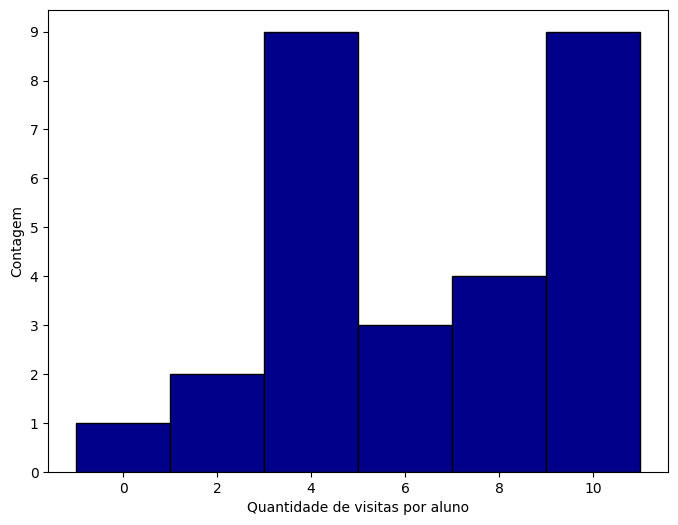

In [305]:
# plotting PA_3 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3, bins=PA_3_bins, color=fig_default_color, align='left', edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_histogram')
    
# showing the figure
plt.show()

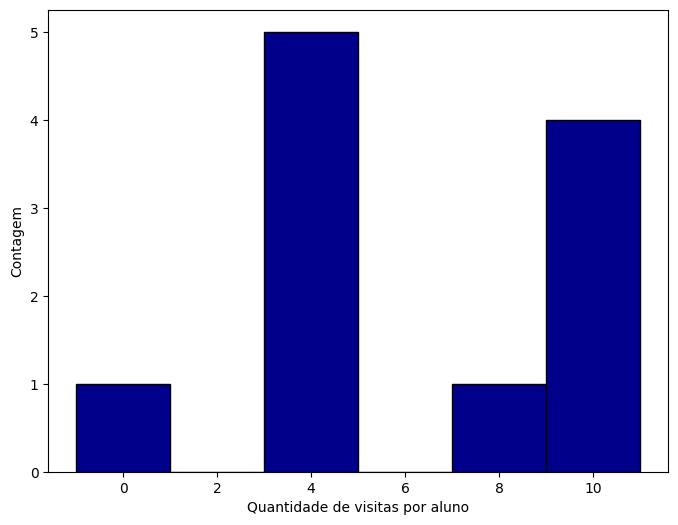

In [306]:
# plotting PA_3 histogram for monday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3_monday, bins=PA_3_bins, color=fig_default_color, align='left', edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_monday_histogram')
    
# showing the figure
plt.show()

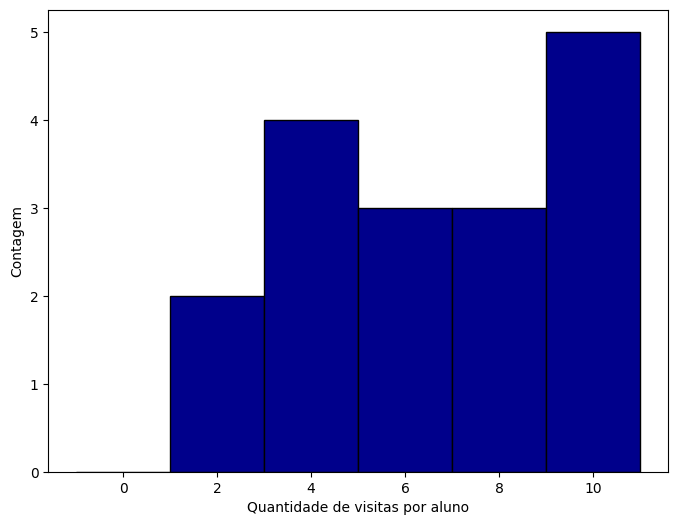

In [307]:

# plotting PA_3 histogram for wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3_wednesday, bins=PA_3_bins, color=fig_default_color, align='left', edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_wednesday_histogram')
    
# showing the figure
plt.show()

In [308]:
PA_3_data = [PA_3, PA_3_monday, PA_3_wednesday]

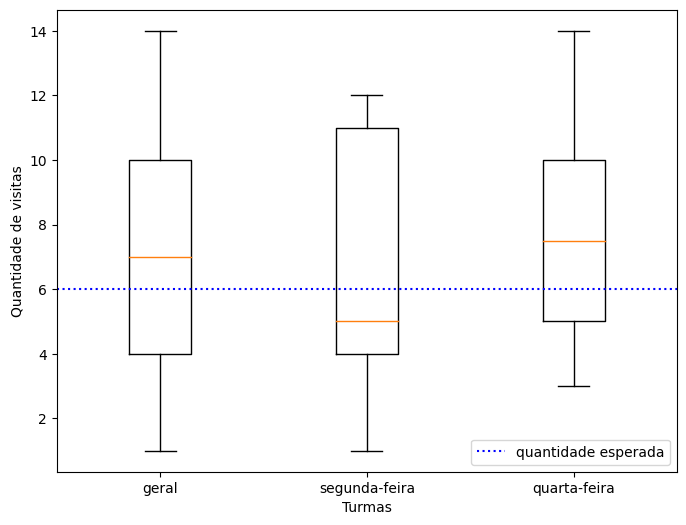

In [309]:
# plotting PA_3 box plot for the general, monday and wednesday groups 
fig, axs = plt.subplots(figsize=fig_default_size)

# considering 4 weeks of hands-on project development, with 50% (4 + 2 = 6) margin
PA_3_expected_visits = 6

# plotting the box plot
plt.boxplot(PA_3_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])
plt.axhline(y=PA_3_expected_visits, color='b', linestyle='dotted', label='quantidade esperada')

# axs setting
axs.set_xlabel('Turmas')
axs.set_ylabel('Quantidade de visitas')
axs.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_boxplot')
    
# showing the figure
plt.show()

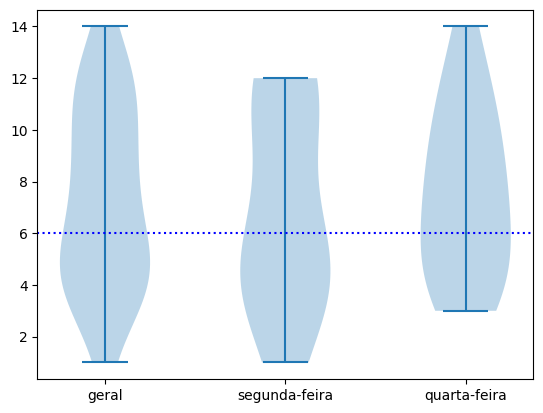

In [310]:

# plotting the violinplot
plt.violinplot(PA_3_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])
plt.axhline(y=PA_3_expected_visits, color='b', linestyle='dotted', label='quantidade esperada')

# axs setting
axs.set_xlabel('Turmas')
axs.set_ylabel('Quantidade de visitas')
axs.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_violinplot')
    
# showing the figure
plt.show()

In [311]:
# PA_3 resume
# PA_3_expected_visits

PA_3_exceded = PA_3[PA_3 > PA_3_expected_visits]
PA_3_monday_exceded = PA_3_monday[PA_3_monday > PA_3_expected_visits]
PA_3_wednesday_exceded = PA_3_wednesday[PA_3_wednesday > PA_3_expected_visits]

PA_3_exceded_fraction = PA_3_exceded.size/PA_3.size
PA_3_monday_exceded_fraction = PA_3_monday_exceded.size/PA_3_monday.size
PA_3_wednesday_exceded_fraction = PA_3_wednesday_exceded.size/PA_3_wednesday.size

PA_3_general_resume = [np.min(PA_3), np.max(PA_3), np.mean(PA_3), np.median(PA_3), 
                       np.percentile(PA_3, 25), np.percentile(PA_3, 75), 
                       PA_3_exceded.size, 100*PA_3_exceded_fraction]

PA_3_monday_resume = [np.min(PA_3_monday), np.max(PA_3_monday), np.mean(PA_3_monday), np.median(PA_3_monday), 
                       np.percentile(PA_3_monday, 25), np.percentile(PA_3_monday, 75), 
                       PA_3_monday_exceded.size, 100*PA_3_monday_exceded_fraction]

PA_3_wednesday_resume = [np.min(PA_3_wednesday), np.max(PA_3_wednesday), np.mean(PA_3_wednesday), np.median(PA_3_wednesday), 
                       np.percentile(PA_3_wednesday, 25), np.percentile(PA_3_wednesday, 75), 
                       PA_3_wednesday_exceded.size, 100*PA_3_wednesday_exceded_fraction]

PA_3_resume_indexes = ['geral', 'segunda', 'quarta']
PA_3_resume_columns = ['mínimo', 'máximo', 'média', 'mediana', '1º quartil', '3º quartil', 'excedidos', 'excedidos (%)']

PA_3_resume_table = pd.DataFrame([PA_3_general_resume, PA_3_monday_resume, PA_3_wednesday_resume], columns=PA_3_resume_columns, index=PA_3_resume_indexes)

PA_3_resume_table

,mínimo,máximo,média,mediana,1º quartil,3º quartil,excedidos,excedidos (%)
geral,1.0,14.0,7.310345,7.0,4.0,10.0,15,51.724138
segunda,1.0,12.0,7.000000,5.0,4.0,11.0,5,45.454545
quarta,3.0,14.0,7.500000,7.5,5.0,10.0,10,55.555556


In [312]:
# confidence intervals
PA_3_ci_low, PA_3_ci_high = sm.stats.proportion_confint(
    PA_3_exceded.size,
    PA_3.size,
    alpha=0.05,
    method='normal'
    )

PA_3_monday_ci_low, PA_3_monday_ci_high = sm.stats.proportion_confint(
    PA_3_monday_exceded.size,
    PA_3_monday.size,
    alpha=0.05,
    method='normal'
    )

PA_3_wednesday_ci_low, PA_3_wednesday_ci_high = sm.stats.proportion_confint(
    PA_3_wednesday_exceded.size,
    PA_3_wednesday.size,
    alpha=0.05,
    method='normal'
    )

print(f'PA_3 confidence intervals for bin data:')
print(f'general:   ({PA_3_ci_low}, {PA_3_ci_high})')
print(f'monday:    ({PA_3_monday_ci_low}, {PA_3_monday_ci_high})')
print(f'wednesday: ({PA_3_wednesday_ci_low}, {PA_3_wednesday_ci_high})')

PA_3 confidence intervals for bin data:
general:   (0.33537151551979943, 0.6991112431008903)
monday:    (0.16029327346391603, 0.748797635626993)
wednesday: (0.32600183988719944, 0.7851092712239117)


### PA_4
Quantas horas aproximadamente, você investiu no projeto, somente de tempo fora de sala de aula por semana? (openlab + tempo na poli ou em casa, desenvolvendo o projeto)

In [313]:
PA_4 = df['PA_4']
PA_4_monday = monday_df['PA_4']
PA_4_wednesday = wednesday_df['PA_4']

PA_4 = PA_4.dropna()
PA_4_monday = PA_4_monday.dropna()
PA_4_wednesday = PA_4_wednesday.dropna()

PA_4.shape, PA_4_monday.shape, PA_4_wednesday.shape

((28,), (11,), (17,))

In [314]:
PA_4_n_sturges_rule = int(np.round(1 + np.log2(PA_4.size)))


print(f'n histogram classes = {PA_4_n_sturges_rule}')

n histogram classes = 6


In [315]:
PA_4_bins = np.arange(0, 20*(PA_4_n_sturges_rule + 1), 20)
PA_4_bins

array([  0,  20,  40,  60,  80, 100, 120])

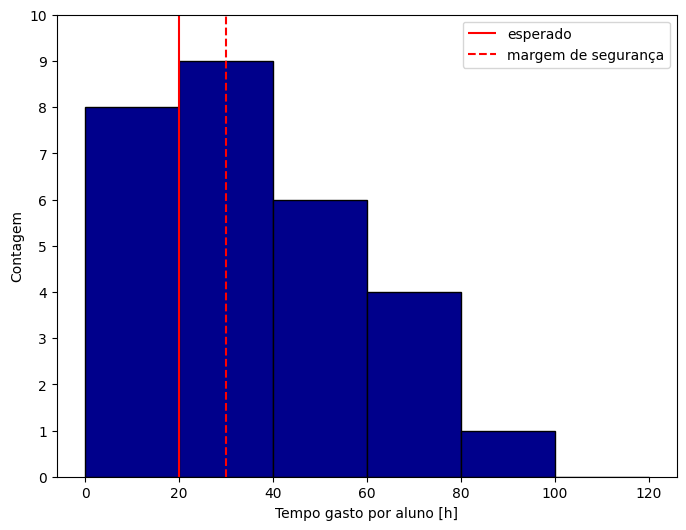

In [316]:
# plotting PA_4 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_4_expected_hours = 20
PA_4_expected_hours_safety_margin = 10

# axs setting
axs.hist(PA_4, bins=PA_4_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 10)

# vertical lines of the expected
axs.vlines(PA_4_expected_hours, 0, 10, linestyles='solid', color='r', label='esperado')
axs.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, 10, linestyles='dashed', color='r', label='margem de segurança')

axs.set_xlabel('Tempo gasto por aluno [h]')
axs.set_ylabel('Contagem')
axs.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_histogram')
    
# showing the figure
plt.show()

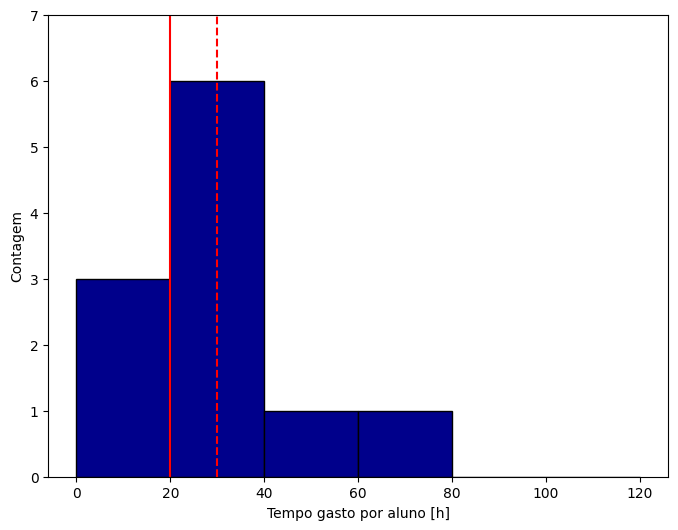

In [317]:
# plotting PA_4 histogram for monday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_4_monday, bins=PA_4_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 7)

# vertical lines of the expected
axs.vlines(PA_4_expected_hours, 0, 7, linestyles='solid', color='r', label='esperado')
axs.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, 7, linestyles='dashed', color='r', label='esperado')

axs.set_xlabel('Tempo gasto por aluno [h]')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_monday_histogram')
    
# showing the figure
plt.show()

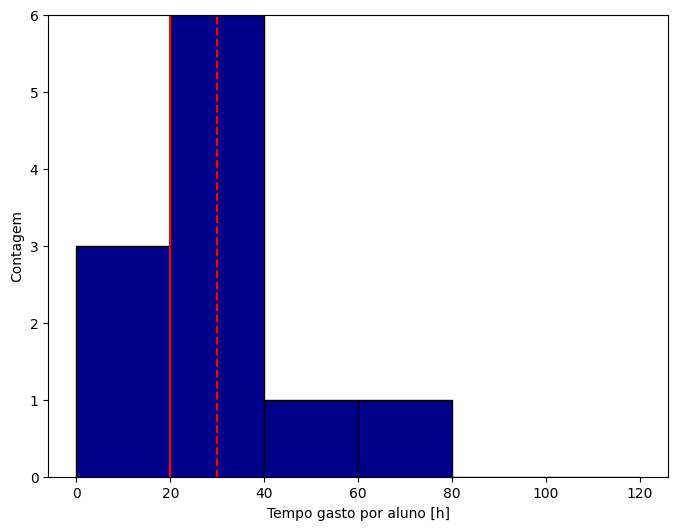

In [318]:
# plotting PA_4 histogram for wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_4_monday, bins=PA_4_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 6)

# vertical lines of the expected
axs.vlines(PA_4_expected_hours, 0, 6, linestyles='solid', color='r', label='esperado')
axs.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, 6, linestyles='dashed', color='r', label='esperado')

axs.set_xlabel('Tempo gasto por aluno [h]')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_wednesday_histogram')
    
# showing the figure
plt.show()

In [369]:
PA_4_soft_exceeded = PA_4[PA_4 > PA_4_expected_hours].size
PA_4_hard_exceeded = PA_4[PA_4 > PA_4_expected_hours + PA_4_expected_hours_safety_margin].size

PA_4_monday_soft_exceeded = PA_4_monday[PA_4_monday > PA_4_expected_hours].size
PA_4_monday_hard_exceeded = PA_4_monday[PA_4_monday > PA_4_expected_hours + PA_4_expected_hours_safety_margin].size

PA_4_wednesday_soft_exceeded = PA_4_wednesday[PA_4_wednesday > PA_4_expected_hours].size
PA_4_wednesday_hard_exceeded = PA_4_wednesday[PA_4_wednesday > PA_4_expected_hours + PA_4_expected_hours_safety_margin].size

PA_4_indexes = ['general', 'monday', 'wednesday']

PA_4_resume_data = [
    {
        'total': PA_4.size,
        'soft_exceeded': PA_4_soft_exceeded,
        'soft_exceeded_proportion': PA_4_soft_exceeded/PA_4.size,
        'hard_exceeded': PA_4_hard_exceeded,
        'hard_exceeded_proportion': PA_4_hard_exceeded/PA_4.size
    },
    {
        'total': PA_4_monday.size,
        'soft_exceeded': PA_4_monday_soft_exceeded,
        'soft_exceeded_proportion': PA_4_monday_soft_exceeded/PA_4_monday.size,
        'hard_exceeded': PA_4_monday_hard_exceeded,
        'hard_exceeded_proportion': PA_4_monday_hard_exceeded/PA_4_monday.size
    },
    {
        'total': PA_4_wednesday.size,
        'soft_exceeded': PA_4_wednesday_soft_exceeded,
        'soft_exceeded_proportion': PA_4_wednesday_soft_exceeded/PA_4_wednesday.size,
        'hard_exceeded': PA_4_wednesday_hard_exceeded,
        'hard_exceeded_proportion': PA_4_wednesday_hard_exceeded/PA_4_wednesday.size
    },
]


PA_4_resume_data_table = pd.DataFrame(PA_4_resume_data, index=PA_4_indexes)
PA_4_resume_data_table

,total,soft_exceeded,soft_exceeded_proportion,hard_exceeded,hard_exceeded_proportion
general,28,16,0.571429,12,0.428571
monday,11,5,0.454545,3,0.272727
wednesday,17,11,0.647059,9,0.529412


In [376]:
# confidence intervals

# general
PA_4_soft_ci_low, PA_4_soft_ci_high = sm.stats.proportion_confint(
    PA_4_soft_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

PA_4_hard_ci_low, PA_4_hard_ci_high = sm.stats.proportion_confint(
    PA_4_hard_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

# monday
PA_4_monday_soft_ci_low, PA_4_monday_soft_ci_high = sm.stats.proportion_confint(
    PA_4_monday_soft_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

PA_4_monday_hard_ci_low, PA_4_monday_hard_ci_high = sm.stats.proportion_confint(
    PA_4_monday_hard_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

# wednesday
PA_4_wednesday_soft_ci_low, PA_4_wednesday_soft_ci_high = sm.stats.proportion_confint(
    PA_4_wednesday_soft_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

PA_4_monday_hard_ci_low, PA_4_monday_hard_ci_high = sm.stats.proportion_confint(
    PA_4_wednesday_hard_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )


print(f'PA_2 confidence intervals (soft)')
print(f'general (soft):     ({PA_4_soft_ci_low}, {PA_4_soft_ci_high})')
print(f'monday (soft):      ({PA_4_monday_soft_ci_low}, {PA_4_monday_soft_ci_high})')
print(f'wednesday (soft):   ({PA_4_wednesday_soft_ci_low}, {PA_4_wednesday_soft_ci_high})')
print(f'PA_2 confidence intervals (hard)')
print(f'general (hard):     ({PA_4_hard_ci_low}, {PA_4_hard_ci_high})')
print(f'monday (hard):      ({PA_4_monday_hard_ci_low}, {PA_4_monday_hard_ci_high})')
print(f'wednesday (hard):   ({PA_4_monday_hard_ci_low}, {PA_4_monday_hard_ci_high})')

PA_2 confidence intervals (soft)
general (soft):     (0.38812891186648857, 0.7547282309906542)
monday (soft):      (0.036711425739059056, 0.3204314314037981)
wednesday (soft):   (0.21195994179548827, 0.5737543439187974)
PA_2 confidence intervals (hard)
general (hard):     (0.24527176900934575, 0.6118710881335113)
monday (hard):      (0.14844331121166918, 0.4944138316454737)
wednesday (hard):   (0.14844331121166918, 0.4944138316454737)


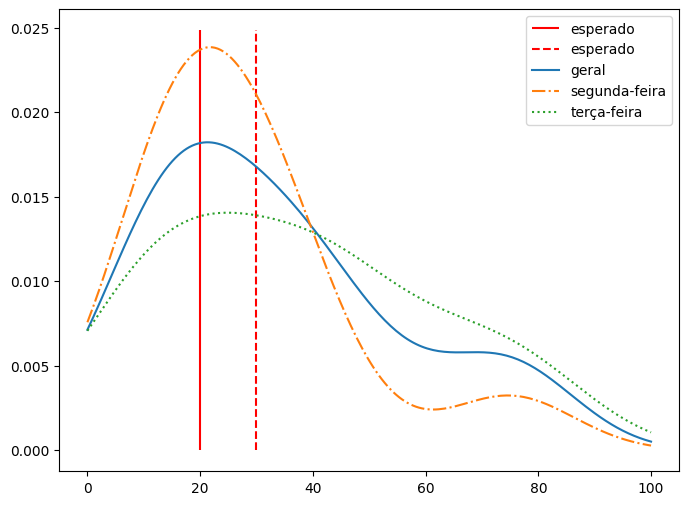

In [320]:
PA_4_x = np.linspace(0, 100, 200)

# general
density = gaussian_kde(PA_4)
PA_4_y = density(PA_4_x)

# monday
density = gaussian_kde(PA_4_monday)
PA_4_monday_y = density(PA_4_x)

# wednesday
density = gaussian_kde(PA_4_wednesday)
PA_4_wednesday_y = density(PA_4_x)

# top of the graph, for plotting purposes
PA_4_y_max = np.max([
    np.max(PA_4_y),
    np.max(PA_4_monday_y),
    np.max(PA_4_wednesday_y)
    ])
PA_4_graph_top = PA_4_y_max + 0.001

# Set the figure size
plt.figure(figsize=fig_default_size)

plt.vlines(PA_4_expected_hours, 0, PA_4_graph_top, linestyles='solid', color='r', label='esperado')
plt.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, PA_4_graph_top, linestyles='dashed', color='r', label='esperado')

plt.plot(PA_4_x, PA_4_y, label='geral', linestyle='-')
plt.plot(PA_4_x, PA_4_monday_y, label='segunda-feira', linestyle='-.')
plt.plot(PA_4_x, PA_4_wednesday_y, label='terça-feira', linestyle=':')
plt.legend()

# linestyle='-'
# linestyle='--'
# linestyle=':'
# linestyle='-.'

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_density_kernels')
    
# showing the figure
plt.show()

/home/henrique/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_qq : Removed 3 rows containing non-finite values.
/home/henrique/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_qq_line : Removed 3 rows containing non-finite values.


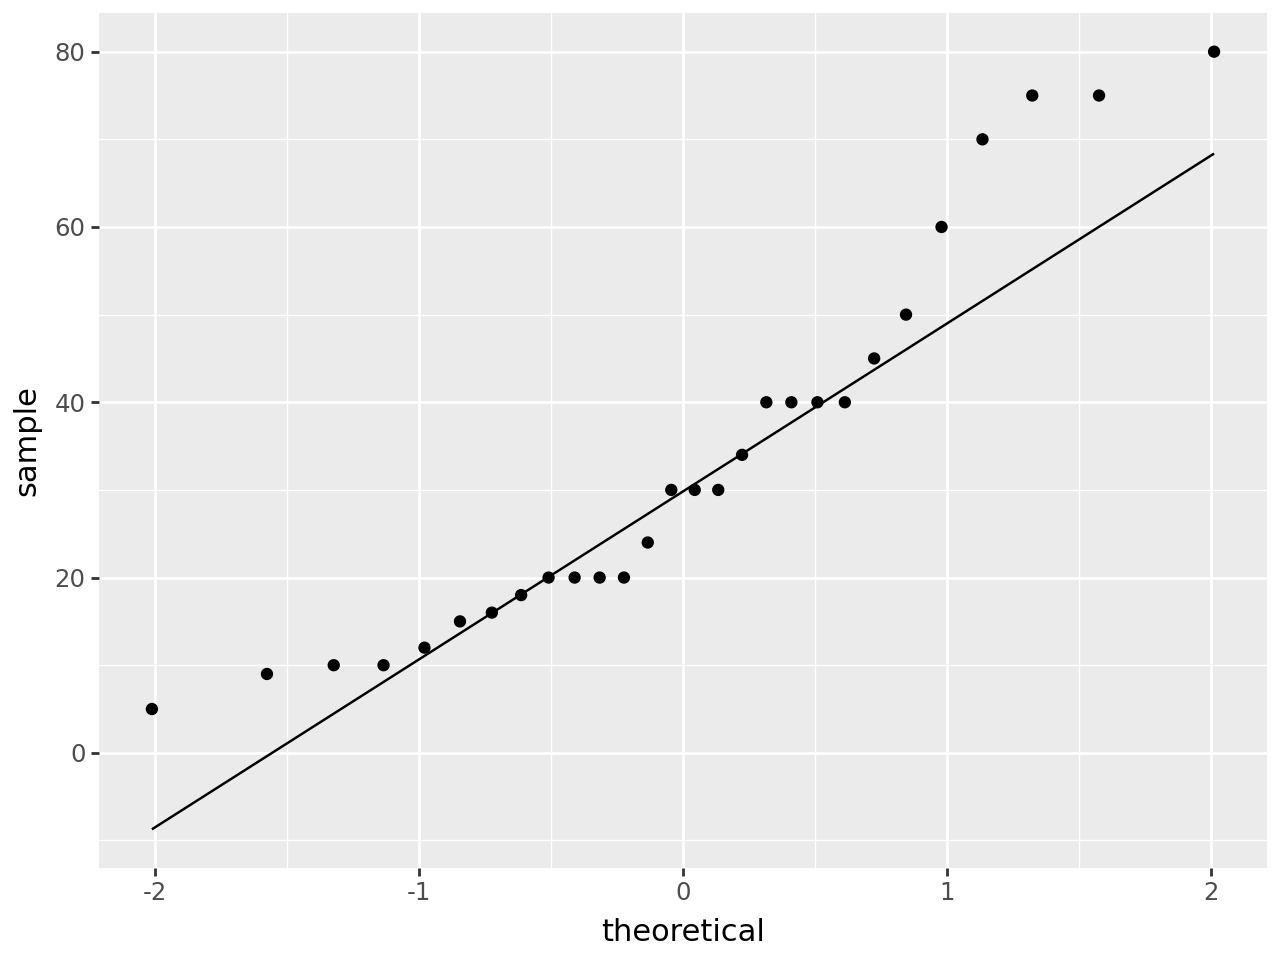

In [321]:
(
    ggplot(df, aes(sample="PA_4"))+ 
    geom_qq()+
    geom_qq_line()
)

/home/henrique/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 3 rows containing non-finite values.


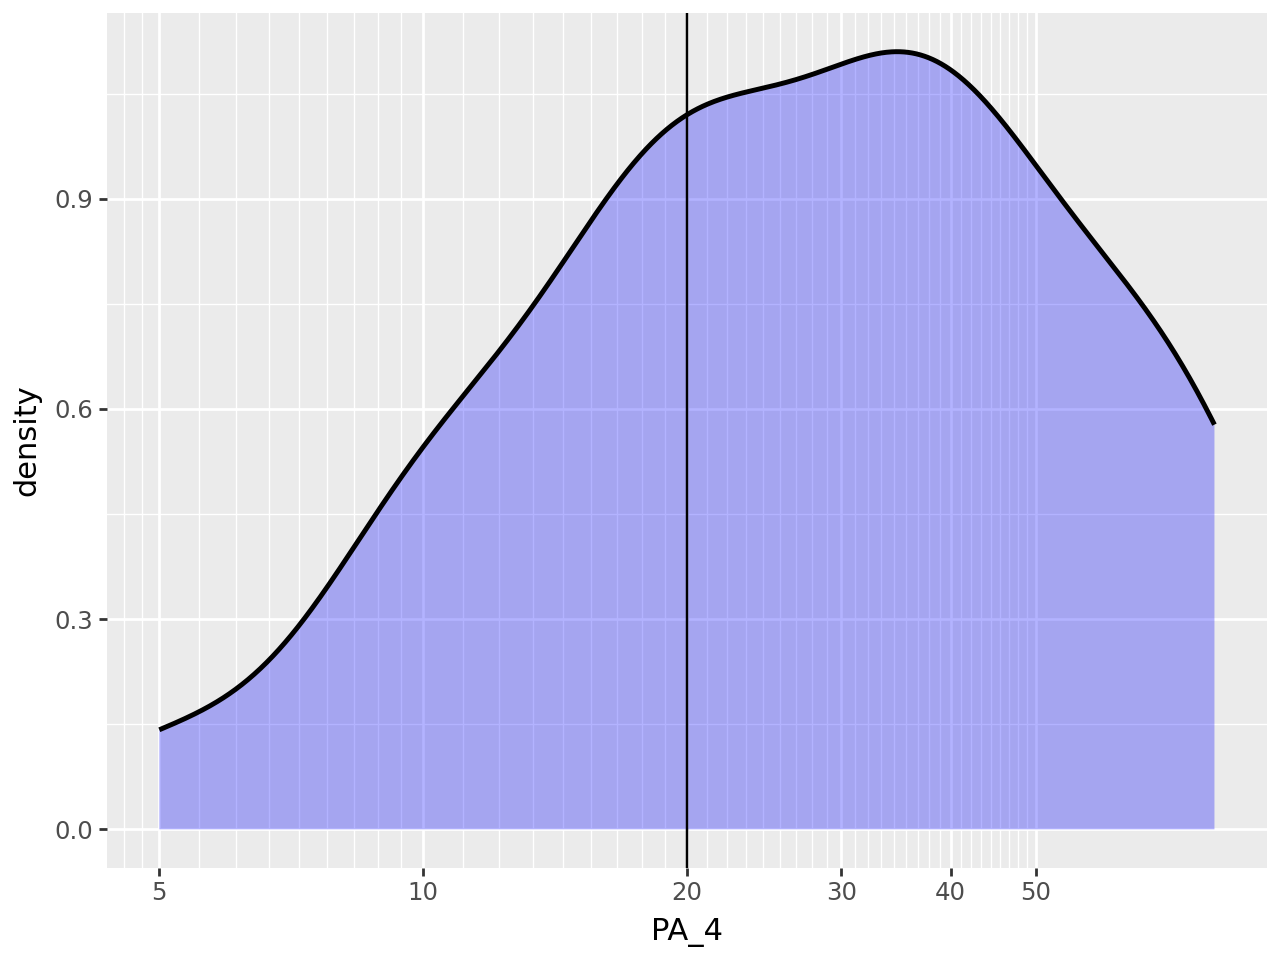

In [322]:
(
    ggplot(df, aes(x="PA_4"))
    + geom_density(fill='blue',alpha=0.3,size=1)+
    geom_vline(xintercept=20)+
    scale_x_log10(breaks=[1,3,5,10,20,30,40,50])
    
)

### PA_5
De forma geral, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito prejuízo]

In [323]:
PA_5 = df['PA_5']
PA_5_monday = monday_df['PA_5']
PA_5_wednesday = wednesday_df['PA_5']

PA_5.shape, PA_5_monday.shape, PA_5_wednesday.shape

((31,), (11,), (20,))

In [324]:
PA_5_counting = count_linkert(PA_5)
PA_5_monday_counting = count_linkert(PA_5_monday)
PA_5_wednesday_counting = count_linkert(PA_5_wednesday)

PA_5_counting, PA_5_monday_counting, PA_5_wednesday_counting

(array([ 2.,  5., 10.,  8.,  6.]),
 array([1., 2., 3., 2., 3.]),
 array([1., 3., 7., 6., 3.]))

In [325]:
PA_5_frequency = PA_5_counting/sum(PA_5_counting)
PA_5_monday_frequency = PA_5_monday_counting/sum(PA_5_monday_counting)
PA_5_wednesday_frequency = PA_5_wednesday_counting/sum(PA_5_wednesday_counting)

PA_5_frequency, PA_5_monday_frequency, PA_5_wednesday_frequency

(array([0.06451613, 0.16129032, 0.32258065, 0.25806452, 0.19354839]),
 array([0.09090909, 0.18181818, 0.27272727, 0.18181818, 0.27272727]),
 array([0.05, 0.15, 0.35, 0.3 , 0.15]))

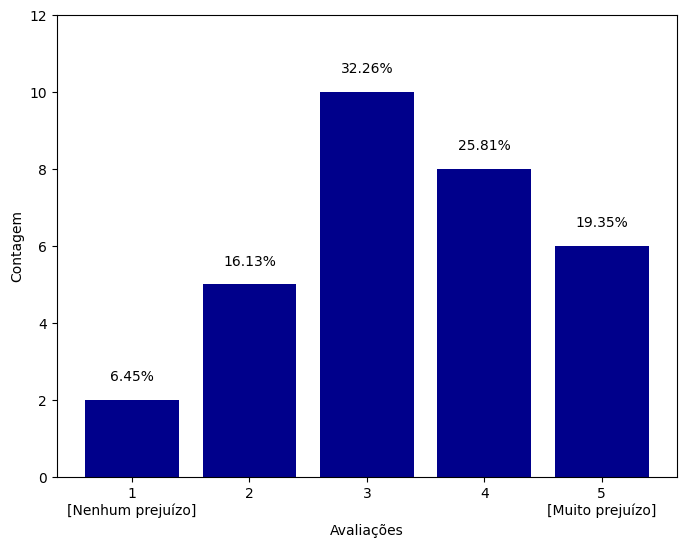

In [326]:
# plotting PA_5 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_5_categories = [
    '1\n[Nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[Muito prejuízo]',
]

axs.bar(PA_5_categories, PA_5_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_5_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_5_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_5_general')
    
# showing the figure
plt.show()

In [327]:
PA_5_bin_counting = sum(PA_5_counting[1:5])
PA_5_counting, PA_5_bin_counting, PA_5_bin_counting/PA_5.size

(array([ 2.,  5., 10.,  8.,  6.]), 29.0, 0.9354838709677419)

### PA_6
Durante as semanas de experimentos, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito]

In [328]:
PA_6 = df['PA_6']
PA_6_monday = monday_df['PA_6']
PA_6_wednesday = wednesday_df['PA_6']

PA_6.shape, PA_6_monday.shape, PA_6_wednesday.shape

((31,), (11,), (20,))

In [329]:
PA_6_counting = count_linkert(PA_6)
PA_6_monday_counting = count_linkert(PA_6_monday)
PA_6_wednesday_counting = count_linkert(PA_6_wednesday)

PA_6_counting, PA_6_monday_counting, PA_6_wednesday_counting

(array([ 8.,  8., 11.,  3.,  1.]),
 array([3., 4., 4., 0., 0.]),
 array([5., 4., 7., 3., 1.]))

In [330]:
PA_6_frequency = PA_6_counting/sum(PA_6_counting)
PA_6_monday_frequency = PA_6_monday_counting/sum(PA_6_monday_counting)
PA_6_wednesday_frequency = PA_6_wednesday_counting/sum(PA_6_wednesday_counting)

PA_6_frequency, PA_6_monday_frequency, PA_6_wednesday_frequency

(array([0.25806452, 0.25806452, 0.35483871, 0.09677419, 0.03225806]),
 array([0.27272727, 0.36363636, 0.36363636, 0.        , 0.        ]),
 array([0.25, 0.2 , 0.35, 0.15, 0.05]))

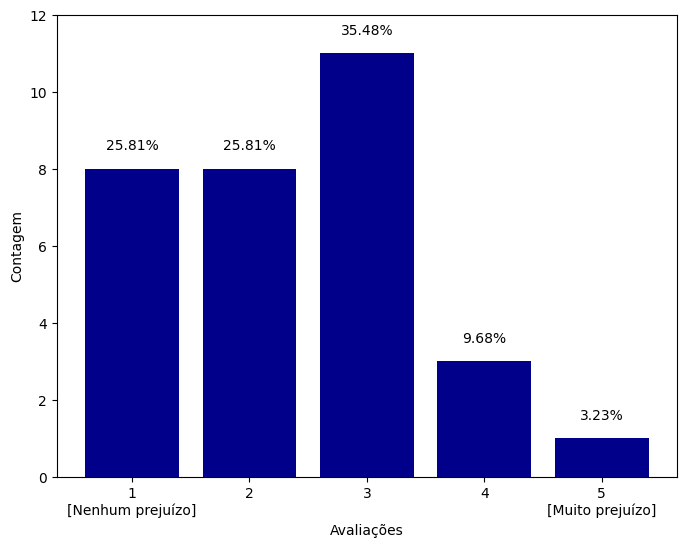

In [331]:
# plotting PA_6 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_6_categories = [
    '1\n[Nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[Muito prejuízo]',
]

axs.bar(PA_6_categories, PA_6_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_6_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_6_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_6_general')
    
# showing the figure
plt.show()

### PA_7
Durante as semanas de projeto, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito]

### PA_8
Se você sofreu prejuízo acadêmico nas outras disciplinas, quais dos seguintes itens se enquadram no seu caso? (deixar em branco, caso contrário)
- **[PA_8_1]** Se atrasar com o conteúdo outras disciplinas
- **[PA_8_2]** Perder aula de outras disciplinas
- **[PA_8_3]** Perda de desempenho nas provas
- **[PA_8_4]** Perda de desempenho nos testinhos de [PTC3007] - Sistemas e Sinais
- **[PA_8_5]** Falta de tempo para relatório de [MAP3122] - Cálculo Numérico
- **[PA_8_6]** Falta de tempo para o EP de [PCS3616] Sistemas de Programação
- **[PA_8_7]** Falta de tempo para o projeto de [PCS3623] Banco de Dados I
- **[PA_8_8]** Dificuldades com matérias do curso semestral (DP ou outros casos)
- **[PA_8_9]** Outros… [Texto Livre]

In [332]:
PA_8 = [df[f'PA_8_{i+1}'] for i in range(9)]
PA_8_monday = [monday_df[f'PA_8_{i+1}'] for i in range(9)]
PA_8_wednesday = [wednesday_df[f'PA_8_{i+1}'] for i in range(9)]

In [333]:
PA_8_size = df['PA_8'].dropna().shape[0]

PA_8_size

29

In [334]:
PS_8_counting = [sum(category) for category in PA_8]
PA_8_monday = [sum(category) for category in PA_8_monday]
PA_8_wednesday = [sum(category) for category in PA_8_wednesday]

PS_8_counting, PA_8_monday, PA_8_wednesday

([24, 24, 14, 17, 17, 13, 21, 4, 1],
 [8, 9, 5, 5, 7, 5, 7, 1, 0],
 [16, 15, 9, 12, 10, 8, 14, 3, 1])

In [335]:
PS_8_counting = [sum(category) for category in PA_8]
PS_8_frequency = [counting/PA_8_size for counting in PS_8_counting]

PS_8_counting, PS_8_frequency

([24, 24, 14, 17, 17, 13, 21, 4, 1],
 [0.8275862068965517,
  0.8275862068965517,
  0.4827586206896552,
  0.5862068965517241,
  0.5862068965517241,
  0.4482758620689655,
  0.7241379310344828,
  0.13793103448275862,
  0.034482758620689655])

0 82.76%
1 82.76%
2 48.28%
3 58.62%
4 58.62%
5 44.83%
6 72.41%
7 13.79%
8 3.45%


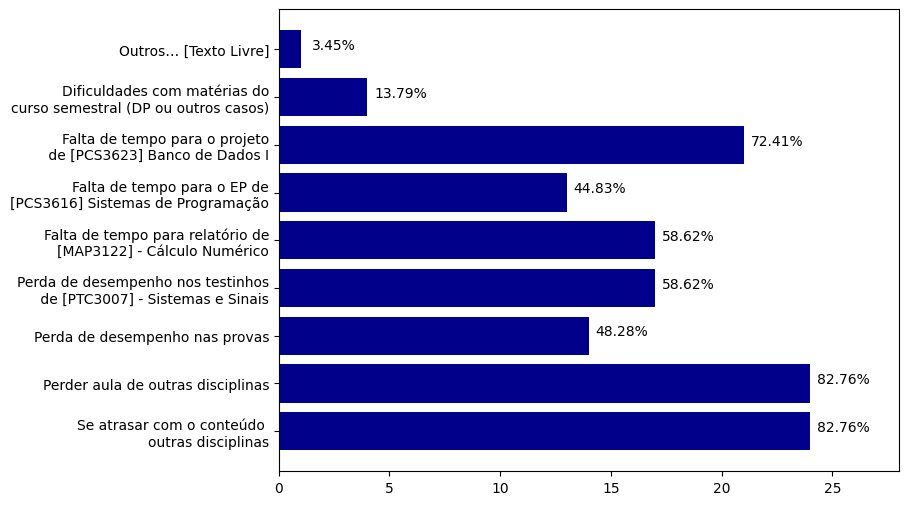

In [336]:
# plotting PA_8 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_8_categories = [
    'Se atrasar com o conteúdo \noutras disciplinas',
    'Perder aula de outras disciplinas',
    'Perda de desempenho nas provas',
    'Perda de desempenho nos testinhos\n de [PTC3007] - Sistemas e Sinais',
    'Falta de tempo para relatório de\n[MAP3122] - Cálculo Numérico',
    'Falta de tempo para o EP de\n[PCS3616] Sistemas de Programação',
    'Falta de tempo para o projeto\n de [PCS3623] Banco de Dados I',
    'Dificuldades com matérias do\ncurso semestral (DP ou outros casos)',
    'Outros… [Texto Livre]'
]

axs.barh(PA_8_categories, PS_8_counting, color=fig_default_color)
axs.set_xlim(0, 28)

# text in the right of the bars
for i in range(9):
    x = PS_8_counting[i] + right_bar_text_offset
    y = i
    percentage_str = get_percentage_str(fraction=PS_8_frequency[i])
    
    print(f'{i} {percentage_str}')
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PS_8_general')
    
# showing the figure
plt.show()

In [337]:
PA_8_df = df[['PA_8_1', 'PA_8_2', 'PA_8_3', 'PA_8_4', 'PA_8_5', 'PA_8_6', 'PA_8_7', 'PA_8_8', 'PA_8_9']]
PA_8_df_monday = monday_df[['PA_8_1', 'PA_8_2', 'PA_8_3', 'PA_8_4', 'PA_8_5', 'PA_8_6', 'PA_8_7', 'PA_8_8', 'PA_8_9']]
PA_8_df_wednesay = wednesday_df[['PA_8_1', 'PA_8_2', 'PA_8_3', 'PA_8_4', 'PA_8_5', 'PA_8_6', 'PA_8_7', 'PA_8_8', 'PA_8_9']]

PA_8_problems_per_person_counting = np.array(PA_8_df.apply(sum, axis=1))
PA_8_monday_problems_per_person_counting = np.array(PA_8_df_monday.apply(sum, axis=1))
PA_8_wednesday_problems_per_person_counting = np.array(PA_8_df_wednesay.apply(sum, axis=1))

print(f'{PA_8_problems_per_person_counting}\n{PA_8_monday_problems_per_person_counting}\n{PA_8_wednesday_problems_per_person_counting}\n')

[7 8 2 5 0 8 4 7 7 7 5 5 4 3 0 3 3 7 1 7 5 2 5 0 6 6 4 3 4 4 3]
[7 8 0 7 5 0 1 5 5 6 3]
[2 5 8 4 7 7 5 4 3 3 3 7 7 2 0 6 4 4 4 3]



(array([ 4.,  2.,  5., 10.,  2.,  8.]),
 array([0.        , 1.33333333, 2.66666667, 4.        , 5.33333333,
        6.66666667, 8.        ]),
 <BarContainer object of 6 artists>)

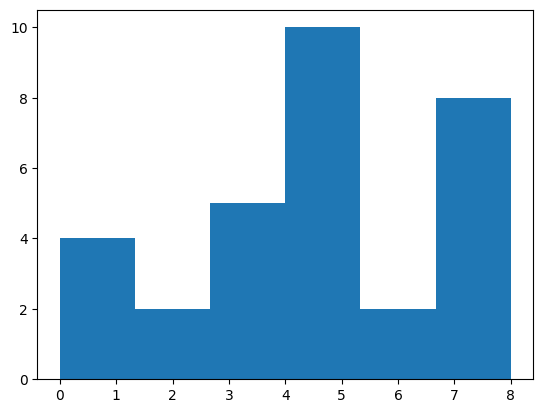

In [338]:
plt.hist(PA_8_problems_per_person_counting, bins=6)

(array([3., 0., 1., 3., 1., 3.]),
 array([0.        , 1.33333333, 2.66666667, 4.        , 5.33333333,
        6.66666667, 8.        ]),
 <BarContainer object of 6 artists>)

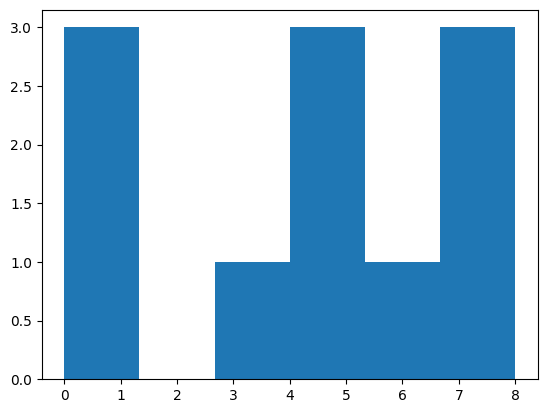

In [339]:
plt.hist(PA_8_monday_problems_per_person_counting, bins=6)

(array([1., 2., 4., 7., 1., 5.]),
 array([0.        , 1.33333333, 2.66666667, 4.        , 5.33333333,
        6.66666667, 8.        ]),
 <BarContainer object of 6 artists>)

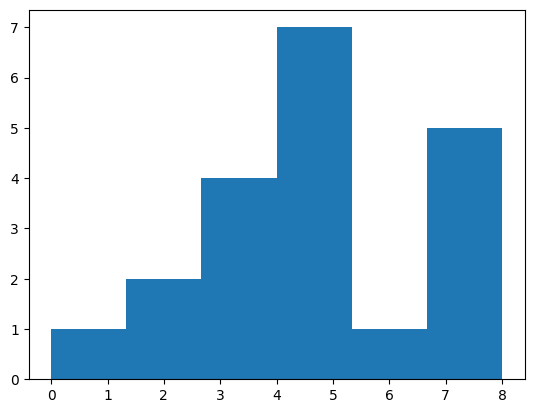

In [340]:
plt.hist(PA_8_wednesday_problems_per_person_counting, bins=6)

### PA_9
Se você perdeu aulas para fazer o projeto da disciplina, diga uma estimativa da quantidade de aulas perdidas, caso você a tenha. [Texto Livre]

### PA_10
Numa escala de 1 a 5, qual o seu grau de satisfação geral com o tempo despendido em Lab Dig?
- (a) 1 [Muito insatisfeita(o)]
- (a) 2
- (a) 3
- (a) 4
- (a) 5 [Muito satisfeita(o)]


### PA_11
Numa escala de 1 a 5, como você avalia a especificação de requisitos do projeto, nas semanas 0.1 e 0.2, nos aspectos abaixo? [Escala de 1 a 5 para cada item]
- **PA_11_1** plausibilidade técnica, dentro do prazo proposto	
- **PA_11_2** coerência com o conteúdo dado na disciplina	
- **PA_11_3** flexibilidade com o projeto, para que o grupo pudesse optar por algo mais simples	
- **PA_11_4** clareza da orientação	
- **PA_11_5** comunicação dos docentes	
- **PA_11_6** complexidade do projeto, de forma geral	


### PA_12
Qual o seu grau de satisfação com a disciplina quanto aos elementos abaixo? [respostas possíveis são Muito Insatisfeito(a), Insatisfeito(a), Neutro(a), Satisfeito(a) e Muito Satisfeito(a)]
- **[PA_12_1]** A Disciplina em Geral	
- **[PA_12_2]** Semanas de Experimento	
- **[PA_12_3]** Semanas de Projeto	
- **[PA_12_4]** Quantidade de relatórios	
- **[PA_12_5]** Complexidade dos relatórios	
- **[PA_12_6]** Uso do tempo de sala	
- **[PA_12_7]** Uso do tempo fora de sala	
- **[PA_12_8]** Comunicação com os docentes	
- **[PA_12_9]** Flexibilidade dos docentes	

## Pesquisa de Saúde

### PS_1
Você sentiu algum prejuízo em termos de saúde mental?
- (a) 1 [Não, estou bem]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Sim, e muito]

    

In [341]:
PS_1 = df['PS_1']
PS_1_monday = monday_df['PS_1']
PS_1_wednesday = wednesday_df['PS_1']

PS_1.shape, PS_1_monday.shape, PS_1_wednesday.shape

((31,), (11,), (20,))

In [342]:
PS_1_counting = count_linkert(PS_1)
PS_1_monday_counting = count_linkert(PS_1_monday)
PS_1_wednesday_counting = count_linkert(PS_1_wednesday)

PS_1_counting, PS_1_monday_counting, PS_1_wednesday_counting

(array([ 7., 11.,  5.,  5.,  3.]),
 array([4., 2., 1., 2., 2.]),
 array([3., 9., 4., 3., 1.]))

In [343]:
PS_1_frequency = PS_1_counting/sum(PS_1_counting)
PS_1_monday_frequency = PS_1_monday_counting/sum(PS_1_monday_counting)
PS_1_wednesday_frequency = PS_1_wednesday_counting/sum(PS_1_wednesday_counting)

PS_1_frequency, PS_1_monday_frequency, PS_1_wednesday_frequency

(array([0.22580645, 0.35483871, 0.16129032, 0.16129032, 0.09677419]),
 array([0.36363636, 0.18181818, 0.09090909, 0.18181818, 0.18181818]),
 array([0.15, 0.45, 0.2 , 0.15, 0.05]))

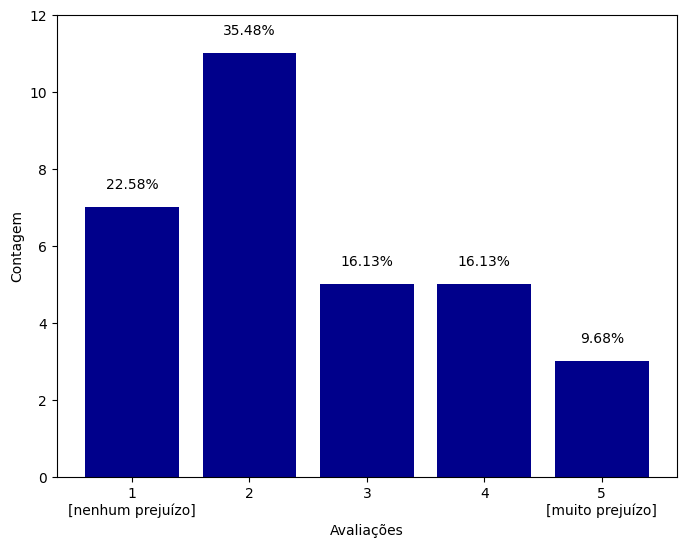

In [344]:
# plotting PS_1 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PS_1_categories = [
    '1\n[nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[muito prejuízo]',
]

axs.bar(PS_1_categories, PS_1_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PS_1_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PS_1_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PS_1_general')
    
# showing the figure
plt.show()

### PS_2
Você sentiu algum prejuízo em termos de saúde física?
- (a) 1 [Não, estou bem]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Sim, e muito]

In [345]:
PS_2 = df['PS_2'].dropna()
PS_2_monday = monday_df['PS_2'].dropna()
PS_2_wednesday = wednesday_df['PS_2'].dropna()

PS_2.shape, PS_2_monday.shape, PS_2_wednesday.shape

((31,), (11,), (20,))

In [346]:
PS_2

0     3
1     4
2     2
3     2
4     1
5     4
6     3
7     3
8     4
9     4
10    3
11    1
12    4
13    2
14    1
15    3
16    5
17    2
18    1
19    2
20    4
21    1
22    2
23    1
24    1
25    1
26    1
27    4
28    3
29    1
30    3
Name: PS_2, dtype: int64

### PS_3
Quais dos sintomas abaixo você apresentou e com que intensidade? [Respostas possíveis são: nenhuma manifestação, apresentei um pouco, moderado e apresentei muito]
- **[PS_3_1]** Cansaço	
- **[PS_3_2]** Estresse	
- **[PS_3_3]** Ansiedade	
- **[PS_3_4]** Irritação	
- **[PS_3_5]** Depressão	

### PS_4
Durante as semanas de projeto, como você avalia, a qualidade dos seguintes aspectos? [Respostas possíveis são: péssimo, ruim, neutro, bom e excelente]
- **[PS_4_1]** sono	
- **[PS_4_2]** alimentação	
- **[PS_4_3]** concentração	
- **[PS_4_4]** humor	
- **[PS_4_5]** bem-estar geral	

### PS_5
Em relação a alimentação, você conseguiu se alimentar adequadamente durante as semanas de projeto?
- (a) Sim, me alimentei de forma saudável
- (b) Sim, me alimentei normalmente
- (c) Não, eu me alimentei mal
- (d) Não, tive prejuízos na minha alimentação

In [347]:
PS_5 = df['PS_5'].dropna()
PS_5_monday = monday_df['PS_5'].dropna()
PS_5_wednesday = wednesday_df['PS_5'].dropna()

PS_5.shape, PS_5_monday.shape, PS_5_wednesday.shape

((29,), (10,), (19,))

In [348]:
PS_5, PS_5_monday, PS_5_wednesday

(0     -5.0
 1      5.0
 2      5.0
 3      5.0
 4     15.0
 5    -15.0
 6     -5.0
 7     -5.0
 8    -15.0
 9    -15.0
 10   -15.0
 11     5.0
 12    -5.0
 13    -5.0
 15    -5.0
 16    15.0
 17     5.0
 18     5.0
 19   -15.0
 20    -5.0
 21     5.0
 22    -5.0
 23    15.0
 24    15.0
 25     5.0
 26     5.0
 27     5.0
 29     5.0
 30   -15.0
 Name: PS_5, dtype: float64,
 0     -5.0
 1      5.0
 4     15.0
 8    -15.0
 11     5.0
 18     5.0
 20    -5.0
 22    -5.0
 24    15.0
 27     5.0
 Name: PS_5, dtype: float64,
 2      5.0
 3      5.0
 5    -15.0
 6     -5.0
 7     -5.0
 9    -15.0
 10   -15.0
 12    -5.0
 13    -5.0
 15    -5.0
 16    15.0
 17     5.0
 19   -15.0
 21     5.0
 23    15.0
 25     5.0
 26     5.0
 29     5.0
 30   -15.0
 Name: PS_5, dtype: float64)

In [349]:
PS_5.mean(), PS_5_monday.mean(), PS_5_wednesday.mean()

(-0.5172413793103449, 2.0, -1.8421052631578947)

### PS_6
Se você costuma se alimentar nos bandeijões, a frequência com que você os frequentava foi alterada?
- (a) Sim
- (b) Não



In [350]:
PS_6 = df['PS_6']
PS_6_monday = monday_df['PS_6']
PS_6_wednesday = wednesday_df['PS_6']

PS_6 = PS_6.dropna()
PS_6_monday = PS_6_monday.dropna()
PS_6_wednesday = PS_6_wednesday.dropna()

PS_6.shape, PS_6_monday.shape, PS_6_wednesday.shape

((27,), (9,), (18,))

In [351]:
# getting the total number of ocurrencies
PS_6_yes_count = PS_6[PS_6 == 1].size
PS_6_no_count = PS_6.size - PS_6_yes_count

PS_6_monday_yes_count = PS_6_monday[PS_6_monday == 1].size
PS_6_monday_no_count = PS_6_monday.size - PS_6_monday_yes_count

PS_6_wednesday_yes_count = PS_6_wednesday[PS_6_wednesday == 1].size
PS_6_wednesday_no_count = PS_6_wednesday.size - PS_6_wednesday_yes_count

# getting the proportions
PS_6_yes_proportions = PS_6_yes_count/PS_6.size
PS_6_no_proportions = 1 - PS_6_yes_proportions

PS_6_monday_yes_proportions = PS_6_monday_yes_count/PS_6_monday.size
PS_6_monday_no_proportions = 1 - PS_6_monday_yes_proportions

PS_6_wednesday_yes_proportions = PS_6_wednesday_yes_count/PS_6_wednesday.size
PS_6_wednesday_no_proportions = 1 - PS_6_wednesday_yes_proportions

print('group\t\tyes\tno\t\tyes(%)\t\tno(%)')
print(f'general\t{PS_6_yes_count}\t{PS_6_no_count}\t{PS_6_yes_proportions}\t{PS_6_no_proportions}')
print(f'monday\t{PS_6_monday_yes_count}\t{PS_6_monday_no_count}\t{PS_6_monday_yes_proportions}\t{PS_6_monday_no_proportions}')
print(f'wednesday\t{PS_6_wednesday_yes_count}\t{PS_6_wednesday_no_count}\t{PS_6_wednesday_yes_proportions}\t{PS_6_wednesday_no_proportions}')

group		yes	no		yes(%)		no(%)
general	17	10	0.6296296296296297	0.37037037037037035
monday	6	3	0.6666666666666666	0.33333333333333337
wednesday	11	7	0.6111111111111112	0.38888888888888884


In [352]:
PS_6_resume = {
    'geral': [PS_6_yes_count, PS_6_no_count, PS_6_yes_proportions, PS_6_no_proportions],
    'segunda': [PS_6_monday_yes_count, PS_6_monday_no_count, PS_6_monday_yes_proportions, PS_6_monday_no_proportions],
    'quarta': [PS_6_wednesday_yes_count, PS_6_wednesday_no_count, PS_6_wednesday_yes_proportions, PS_6_wednesday_no_proportions],
}

PS_6_resume = [
    {'yes': PS_6_yes_count, 'no': PS_6_no_count, 'yes(%)': PS_6_yes_proportions, 'no(%)': PS_6_no_proportions},
    {'yes': PS_6_monday_yes_count, 'no': PS_6_monday_no_count, 'yes(%)': PS_6_monday_yes_proportions, 'no(%)': PS_6_monday_no_proportions},
    {'yes': PS_6_wednesday_yes_count, 'no': PS_6_wednesday_no_count, 'yes(%)': PS_6_wednesday_yes_proportions, 'no(%)': PS_6_wednesday_no_proportions}
]

PA_6_indexes = ['general', 'monday', 'wednesday']

PS_6_resume_table = pd.DataFrame(PS_6_resume, index=PA_6_indexes)
PS_6_resume_table

,yes,no,yes(%),no(%)
general,17,10,0.629630,0.370370
monday,6,3,0.666667,0.333333
wednesday,11,7,0.611111,0.388889


### PS_7
Você pulou refeições nas semanas de projetos? Com que frequência? [Respostas Possíveis são: não pulei, pulei às vezes e pulei frequentemente]
- **[PS_7_1]** café da manhã	
- **[PS_7_2]** almoço	
- **[PS_7_3]** jantar	

In [353]:
PS_7 = df[['PS_7_1', 'PS_7_2', 'PS_7_3']].dropna()
PS_7_monday = monday_df[['PS_7_1', 'PS_7_2', 'PS_7_3']].dropna()
PS_7_wednesday = wednesday_df[['PS_7_1', 'PS_7_2', 'PS_7_3']].dropna()

PS_7, PS_7_monday, PS_7_wednesday

(    PS_7_1  PS_7_2  PS_7_3
 0      2.0     1.0     0.0
 1      0.0     2.0     1.0
 2      0.0     0.0     0.0
 3      0.0     0.0     0.0
 4      0.0     0.0     0.0
 5      0.0     2.0     1.0
 6      2.0     2.0     1.0
 7      0.0     0.0     0.0
 8      2.0     1.0     1.0
 9      2.0     2.0     1.0
 10     2.0     2.0     2.0
 11     0.0     0.0     0.0
 12     1.0     0.0     2.0
 13     1.0     1.0     1.0
 15     0.0     1.0     1.0
 16     1.0     0.0     0.0
 17     1.0     1.0     0.0
 18     0.0     0.0     0.0
 19     2.0     0.0     0.0
 20     0.0     1.0     0.0
 21     0.0     2.0     0.0
 22     0.0     1.0     0.0
 23     0.0     1.0     0.0
 24     0.0     1.0     0.0
 25     0.0     0.0     1.0
 26     0.0     1.0     0.0
 27     0.0     1.0     1.0
 29     0.0     1.0     0.0
 30     0.0     1.0     1.0,
     PS_7_1  PS_7_2  PS_7_3
 0      2.0     1.0     0.0
 1      0.0     2.0     1.0
 4      0.0     0.0     0.0
 8      2.0     1.0     1.0
 11     0.0     0.0

In [354]:
def at_least_one_non_null(row: pd.Series) -> pd.Series:
    """
    Verifies if the row has, at least, one non null value.

    Args:
        row (pandas.Series): a pandas dataframe or series

    Returns:
        bool: True if, at least, the row have a non null value, False otherwise.

    Example:
        >>> df = pd.DataFrame({'A': [1, 2, np.nan, 4],
        ...                    'B': [np.nan, 2, 3, 4],
        ...                    'C': [1, np.nan, 3, np.nan]})
        
        >>> df['new_column'] = df.apply(at_least_one_non_null, axis=1)
        >>> print(df)
           A    B    C   new_column
        0  1  NaN  1.0   True
        1  2  2.0  NaN   True
        2  NaN  3.0  3.0   True
        3  4  4.0  NaN   True
    """
    for value in row:
        if value != 0: return True
    
    return False

In [355]:
PS_7['altered'] = PS_7.apply(at_least_one_non_null, axis=1)
PS_7_monday['altered'] = PS_7_monday.apply(at_least_one_non_null, axis=1)
PS_7_wednesday['altered'] = PS_7_wednesday.apply(at_least_one_non_null, axis=1)

PS_7, PS_7_monday, PS_7_wednesday

(    PS_7_1  PS_7_2  PS_7_3  altered
 0      2.0     1.0     0.0     True
 1      0.0     2.0     1.0     True
 2      0.0     0.0     0.0    False
 3      0.0     0.0     0.0    False
 4      0.0     0.0     0.0    False
 5      0.0     2.0     1.0     True
 6      2.0     2.0     1.0     True
 7      0.0     0.0     0.0    False
 8      2.0     1.0     1.0     True
 9      2.0     2.0     1.0     True
 10     2.0     2.0     2.0     True
 11     0.0     0.0     0.0    False
 12     1.0     0.0     2.0     True
 13     1.0     1.0     1.0     True
 15     0.0     1.0     1.0     True
 16     1.0     0.0     0.0     True
 17     1.0     1.0     0.0     True
 18     0.0     0.0     0.0    False
 19     2.0     0.0     0.0     True
 20     0.0     1.0     0.0     True
 21     0.0     2.0     0.0     True
 22     0.0     1.0     0.0     True
 23     0.0     1.0     0.0     True
 24     0.0     1.0     0.0     True
 25     0.0     0.0     1.0     True
 26     0.0     1.0     0.0     True
 

In [356]:
PS_7_altered_frequency_counting = PS_7[PS_7['altered'] == True]['altered'].size
PS_7_altered_frequency_proportion = PS_7_altered_frequency_counting/PS_7['altered'].size

PS_7_monday_altered_frequency_counting = PS_7_monday[PS_7_monday['altered'] == True]['altered'].size
PS_7_monday_altered_frequency_proportion = PS_7_monday_altered_frequency_counting/PS_7_monday['altered'].size

PS_7_wednesday_altered_frequency_counting = PS_7_wednesday[PS_7_wednesday['altered'] == True]['altered'].size
PS_7_wednesday_altered_frequency_proportion = PS_7_wednesday_altered_frequency_counting/PS_7_wednesday['altered'].size

PS_7_resume = [
    {'counting': PS_7_altered_frequency_counting, 'proportion': PS_7_altered_frequency_proportion},
    {'counting': PS_7_monday_altered_frequency_counting, 'proportion': PS_7_monday_altered_frequency_proportion},
    {'counting': PS_7_wednesday_altered_frequency_counting, 'proportion': PS_7_wednesday_altered_frequency_proportion}
]

PS_7_resume_indexes = ['general', 'monday', 'wednesay']

pd.DataFrame(PS_7_resume, index=PS_7_resume_indexes)

,counting,proportion
general,23,0.793103
monday,7,0.700000
wednesay,16,0.842105


### PS_8
Caso você se sinta confortável, use esse espaço para se expressar. Garantimos que a resposta será anônima e não será identificada por ninguém. Você pode contar seu relato com a disciplina e como se sentiu em relação a ela, ou dizer o que quiser, sob qualquer posicionamento. [Texto Livre]


In [357]:
PS_8 = df['PS_8'].dropna()
PS_8_monday = monday_df['PS_8'].dropna()
PS_8_wednesday = wednesday_df['PS_8'].dropna()

PS_8.shape, PS_8_monday.shape, PS_8_wednesday.shape

((11,), (4,), (7,))

In [358]:
for i, x in enumerate(PS_8_monday): print(f'R_{i+1}_monday\n{x}\n\nVeredict:\nConfidence: \n\n\n\n')
for i, x in enumerate(PS_8_wednesday): print(f'R_{i+1}_wednesday\n{x}\n\nVeredict:\nConfidence: \n\n\n\n')

R_1_monday
O fato de LabDig exigir mais tempo que o normal que qualquer outra matéria me fez entrar em uma bola de neve de pouco tempo de sono para estudar e fazer os outros projetos de outras matérias. O problema, nas três últimas semanas de Quadri cheguei a consumir por volta de 20L de energético

Veredict:
Confidence: 




R_2_monday
Tive muito estresse com essa disciplina, que não consigo nem descrever. Eu passei incontáveis horas no openlab, perdi um monte de materias, me atrasei com tudo. O projeto foi mal orientado e todos foram impelidos a fazerem um projeto de complexidade bem pior que o tempo da disciplina permite. Tive muita ansiedade nas semanas de projeto e me alimentei muito mal; comia coxinha da minerva várias vezes, ao invés de bandecar. Dormi muito mal e tive bastante insônia. Odiei a experiência.
O midorikawa só nos cobrou e não foi compreensivo. Na semana 3, ele viu que os projetos não estavam nem perto de serem finalizados, porque faltava a montagem física e todos e